In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Modules for ML
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_excel('liked.xlsx')
df = df.drop(columns=['genre','artist_name','track_name','track_id','popularity','time_signature'],axis=1)

encoder = LabelEncoder()
df['key'] = encoder.fit_transform(df['key'])
df['mode']=encoder.fit_transform(df['mode'])
df.shape

(16, 13)

In [5]:
std = StandardScaler()
scalled = std.fit_transform(df.drop(['liked'],axis=1))

In [6]:
i = 0 
for column in df.columns[:-1]:
    df[column] = scalled[:,i]
    i += 1

In [7]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,liked
0,1.543055,-1.102643,-0.506525,-1.521379,-0.430144,-1.2,-0.316854,-0.612925,-0.881917,-0.932552,-1.186636,0.107766,1
1,-0.320377,0.644374,0.319347,0.384299,-0.430144,0.0,-0.419021,0.530101,-0.881917,1.244975,-0.971649,1.063701,0
2,-0.316939,0.980008,-0.521571,-0.449435,-0.430144,0.0,-0.607299,0.270532,-0.881917,-0.567955,-0.609094,-1.701363,1
3,-0.938541,0.704616,-0.265972,-0.231076,-0.430144,-0.8,-0.346044,0.565829,1.133893,-0.814373,0.528507,-0.200456,1
4,-0.842619,0.050560,-0.154075,0.969898,-0.429951,-0.8,-0.741576,1.129087,-0.881917,-0.434688,-0.023122,-0.102182,1


In [11]:
x = df.drop('liked',axis=1)
y = df['liked']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [13]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 477ms/step - loss: 0.8244 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8172 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8102 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8033 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7965 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.5833
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.5833
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.5833
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7696 - accuracy: 0.5833
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.5833
Epoch 11/200
1/1 [=========

In [14]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 0.5117 - accuracy: 0.5000


[0.5117466449737549, 0.5]

In [15]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='YlGnBu')
    plt.title(title)
    plt.show()

1/1 [==============================] - 0s 54ms/step


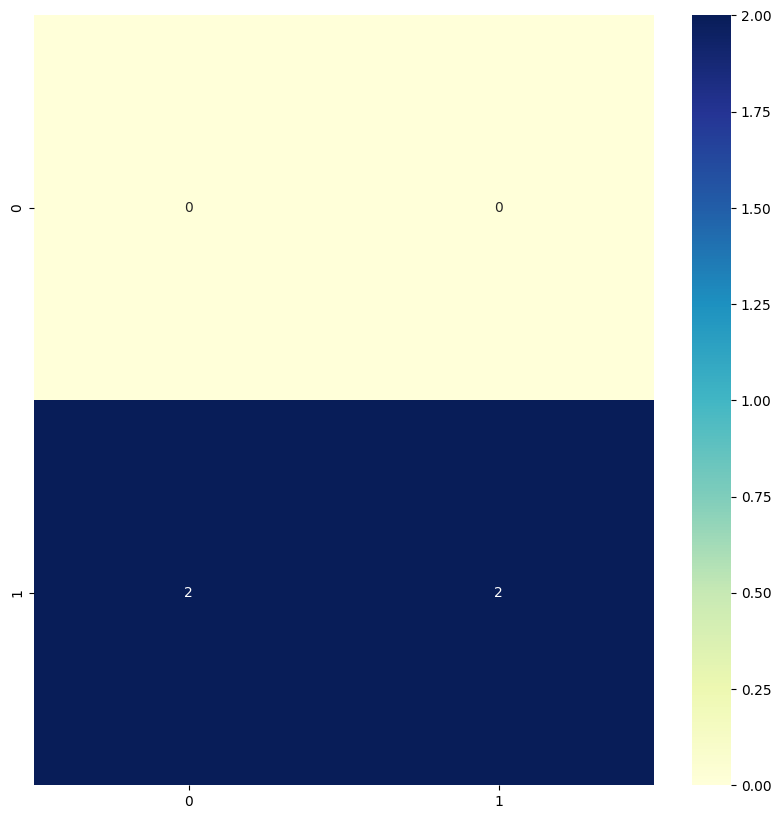

In [16]:
y_pred_test = predict(x_test)
plot_cm(y_test, y_pred_test)

In [112]:
model.save('model/Spotify_model')

INFO:tensorflow:Assets written to: model/Spotify_model\assets


INFO:tensorflow:Assets written to: model/Spotify_model\assets


In [65]:
df2 = pd.read_excel('Spotify.xlsx')

In [113]:
a = df2.drop(columns=['genre','artist_name','track_name','track_id','popularity','time_signature'],axis=1)
from sklearn.preprocessing import LabelEncoder

# Tworzenie obiektu encodera
encoder = LabelEncoder()
# Konwersja kolumny z kategoriami na numeryczną
a['key'] = encoder.fit_transform(a['key'])
a['mode']=encoder.fit_transform(a['mode'])
a.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,0.814
1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,0.816
2,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,0.368
3,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,0.227
4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,0.390


In [114]:
std2 = StandardScaler()
std2.fit(a)
print(std2.mean_)
print(std2.scale_)

[ 3.68560452e-01  5.54364469e-01  2.35122339e+05  5.70957673e-01
  1.48301234e-01  5.34446665e+00  2.15009285e-01 -9.56988540e+00
  3.47968633e-01  1.20765015e-01  1.17666585e+02  4.54916856e-01]
[3.54767277e-01 1.85607826e-01 1.18935654e+05 2.63454996e-01
 3.02767714e-01 3.46163324e+00 1.98272159e-01 5.99819074e+00
 4.76326005e-01 1.85517907e-01 3.08988402e+01 2.60064925e-01]


In [115]:
def new_predict(data):
    #Data must be 2d Array
    #Make sure model is in same directory
    
    mean = np.array([ 3.68560452e-01, 5.54364469e-01, 2.35122339e+05, 5.70957673e-01,
                      1.48301234e-01, 5.34446665e+00, 2.15009285e-01, -9.56988540e+00,
                      3.47968633e-01, 1.20765015e-01, 1.17666585e+02, 4.54916856e-01])
    
    stddev =   np.array([3.54767277e-01, 1.85607826e-01, 1.18935654e+05, 2.63454996e-01,
 3.02767714e-01, 3.46163324e+00, 1.98272159e-01, 5.99819074e+00,
 4.76326005e-01, 1.85517907e-01, 3.08988402e+01, 2.60064925e-01])
    
    scalled = (data - mean)/stddev
    predict_proba = model2.predict(scalled)[0][0]
    predicted = predict_proba >= 0.5
    return predict_proba

In [116]:
#Szukaj po wszystkich
model2 = keras.models.load_model('model/Spotify_model')
for i in range(len(a)):
    case1 = a.loc[1]
    #print("data:\n",case1)
    #print('\n')
    score = new_predict([case1])
    if score > 0.5:
        print(i)

1/1 [==============================] - 0s 14ms/step


KeyboardInterrupt: 

In [121]:
#Szukaj konkretny
model2 = keras.models.load_model('model/Spotify_model')
case1 = a.loc[7570]
print("data:\n",case1)
print('\n')
score = new_predict([case1])
print(score)

data:
 acousticness             0.639000
danceability             0.690000
duration_ms         235067.000000
energy                   0.317000
instrumentalness         0.000049
key                      9.000000
liveness                 0.110000
loudness               -11.316000
mode                     0.000000
speechiness              0.032600
tempo                  127.956000
valence                  0.280000
Name: 7570, dtype: float64


1/1 [==============================] - 0s 42ms/step
0.5411126
